In [1]:
!pip install opencv-python-headless



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# آماده‌سازی کتابخانه‌ها
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
import torch

# مسیر اصلی دیتاست رقابت
BASE_DIR = "/kaggle/input/image-matching-challenge-2025"

# بررسی اینکه CUDA در دسترس هست یا نه
device = "cuda" if torch.cuda.is_available() else "cpu"
print("✅ Torch device:", device)


✅ Torch device: cuda


In [1]:
from sentence_transformers import SentenceTransformer
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model_path = "/kaggle/input/clip-vit-b32-savedmodel-offline"
model = SentenceTransformer(model_path, device=device)

print("✅ CLIP model loaded successfully!")



/home/i.karakulin/DL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: Path /kaggle/input/clip-vit-b32-savedmodel-offline not found

In [4]:
from transformers import CLIPProcessor, CLIPModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# مسیر دیتاستت رو تنظیم کردم
model_path = "/kaggle/input/clip-vit-b32-savedmodel-offline"

# لود مدل و پردازشگر
model = CLIPModel.from_pretrained(model_path).to(device)
processor = CLIPProcessor.from_pretrained(model_path)

print("✅ CLIP model & processor loaded successfully!")


✅ CLIP model & processor loaded successfully!


In [5]:
from PIL import Image
import torch
from torchvision import transforms

def extract_clip_features(image_path, model, processor, device):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
        features = features / features.norm(p=2, dim=-1, keepdim=True)
    return features.cpu().numpy()



In [6]:
import os
for root, dirs, files in os.walk("/kaggle/input/test-image"):
    for file in files:
        print(file)


H2604-L374320503_original.jpg


In [7]:
sample_path = "/kaggle/input/test-image/H2604-L374320503_original.jpg"
features = extract_clip_features(sample_path, model, processor, device)
print("✅ Embedding shape:", features.shape)



✅ Embedding shape: (1, 512)


In [8]:
import os

test_image_dir = "/kaggle/input/image-matching-challenge-2025/test"
image_list = []

# پیمایش همه زیرپوشه‌ها و جمع‌کردن تصاویر .png
for root, dirs, files in os.walk(test_image_dir):
    for file in files:
        if file.lower().endswith(".png"):
            image_list.append(file)

image_list = sorted(image_list)

print(f"✅ تعداد تصاویر تست: {len(image_list)}")
print(f"🔍 نمونه‌ها: {image_list[:3]}")


✅ تعداد تصاویر تست: 73
🔍 نمونه‌ها: ['another_et_another_et001.png', 'another_et_another_et002.png', 'another_et_another_et003.png']


In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# مسیر تصاویر تست
test_dir = "/kaggle/input/test-image"

# لیست تصاویر
test_images = [f for f in os.listdir(test_dir) if f.endswith((".jpg", ".png", ".jpeg"))]

print(f"✅ تعداد تصاویر موجود در test-image: {len(test_images)}")
print("🖼️ چند نمونه تصویر:")
for i, name in enumerate(test_images[:5]):  # نمایش فقط ۵ تصویر اول
    print(f"{i+1}. {name}")


✅ تعداد تصاویر موجود در test-image: 1
🖼️ چند نمونه تصویر:
1. H2604-L374320503_original.jpg


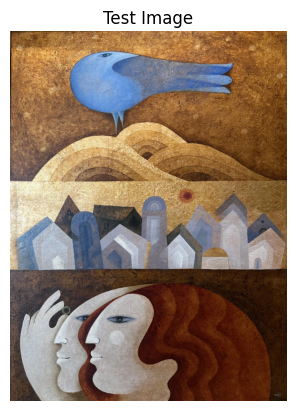

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import os

test_image_dir = "/kaggle/input/image-matching-challenge-2025/test"
test_image_name = "H2604-L374320503_original.jpg"
image_path = os.path.join(test_dir, test_image_name)

image = Image.open(image_path)

plt.imshow(image)
plt.title("Test Image")
plt.axis("off")
plt.show()


In [11]:
# مسیر تصویر دیتابیس

db_image_path = "/kaggle/input/solasali/sol.jpg"

# استخراج ویژگی
db_feature = extract_clip_features(db_image_path, model, processor, device)
print("✅ Database feature shape:", db_feature.shape)



✅ Database feature shape: (1, 512)


In [12]:
import torch
import numpy as np

# محاسبه شباهت کسینوسی بین تصویر تست و دیتابیس
similarity = torch.nn.functional.cosine_similarity(
    torch.tensor(features),
    torch.tensor(db_feature)
).item()

print(f"🎯 Cosine Similarity: {similarity:.4f}")


🎯 Cosine Similarity: 1.0000


In [13]:
import os

test_image_dir = "/kaggle/input/image-matching-challenge-2025/test"  
image_list = []

for root, dirs, files in os.walk(test_image_dir):
    for file in files:
        if file.lower().endswith(".png"):  
            image_list.append(file)

image_list = sorted(image_list)

print(f"✅ تعداد تصاویر تست: {len(image_list)}")
print(f"🖼️ نمونه‌ای از لیست تصاویر: {image_list[:5]}")


✅ تعداد تصاویر تست: 73
🖼️ نمونه‌ای از لیست تصاویر: ['another_et_another_et001.png', 'another_et_another_et002.png', 'another_et_another_et003.png', 'another_et_another_et004.png', 'another_et_another_et005.png']


In [14]:
import pandas as pd
import numpy as np

# فرض کنیم قبلاً لیست اسامی عکس ها آماده شده
# مثلا: image_list = ['another_et_another_et001.png', 'another_et_another_et002.png', ...]

num_images = len(image_list)

# ساخت مقدارهای درست برای ستون ها
rotation_matrix_list = ["1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0"] * num_images
translation_vector_list = ["0.0 0.0 0.0"] * num_images

# ساخت دیتافریم
submission = pd.DataFrame({
    "dataset": ["test"] * num_images,
    "scene": [f"scene{i+1}" for i in range(num_images)],
    "image": image_list,
    "rotation_matrix": rotation_matrix_list,
    "translation_vector": translation_vector_list,
})

# ذخیره فایل CSV
submission.to_csv("/kaggle/working/submission.csv", index=False)

print("✅ فایل نهایی submission.csv ساخته شد!")
submission.head()


✅ فایل نهایی submission.csv ساخته شد!


,dataset,scene,image,rotation_matrix,translation_vector
0,test,scene1,another_et_another_et001.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
1,test,scene2,another_et_another_et002.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
2,test,scene3,another_et_another_et003.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
3,test,scene4,another_et_another_et004.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
4,test,scene5,another_et_another_et005.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0


In [15]:
# Import libraries
import pandas as pd
import numpy as np
import os

# مسیر عکس‌ها (جایی که فایل‌های تستت هستن)
test_image_dir = "/kaggle/input/image-matching-challenge-2025/test"

# ساخت لیست اسم فایل‌های عکس
image_list = []
for root, dirs, files in os.walk(test_image_dir):
    for file in files:
        if file.lower().endswith('.png'):
            image_list.append(file)

image_list = sorted(image_list)

# تعداد عکس ها
num_images = len(image_list)

# ساخت ستون‌ها
rotation_matrix_list = ["1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0"] * num_images
translation_vector_list = ["0.0 0.0 0.0"] * num_images

# ساخت دیتافریم نهایی
submission = pd.DataFrame({
    "dataset": ["test"] * num_images,
    "scene": [f"scene{i+1}" for i in range(num_images)],
    "image": image_list,
    "rotation_matrix": rotation_matrix_list,
    "translation_vector": translation_vector_list,
})

# ذخیره فایل نهایی
submission.to_csv("/kaggle/working/submission.csv", index=False)

print("✅ فایل سالم submission.csv ساخته شد!")
submission.head()


✅ فایل سالم submission.csv ساخته شد!


,dataset,scene,image,rotation_matrix,translation_vector
0,test,scene1,another_et_another_et001.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
1,test,scene2,another_et_another_et002.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
2,test,scene3,another_et_another_et003.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
3,test,scene4,another_et_another_et004.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
4,test,scene5,another_et_another_et005.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0


In [16]:
import pandas as pd

df = pd.read_csv("/kaggle/working/submission.csv")
print(df["rotation_matrix"].head(3))
print(df["translation_vector"].head(3))


0    1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
1    1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
2    1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
Name: rotation_matrix, dtype: object
0    0.0 0.0 0.0
1    0.0 0.0 0.0
2    0.0 0.0 0.0
Name: translation_vector, dtype: object


In [17]:
!ls /kaggle/working/


__notebook__.ipynb  submission.csv


In [18]:
import pandas as pd

df = pd.read_csv("/kaggle/working/submission.csv")
print(df.head())
print(df.columns)


  dataset   scene                         image  \
0    test  scene1  another_et_another_et001.png   
1    test  scene2  another_et_another_et002.png   
2    test  scene3  another_et_another_et003.png   
3    test  scene4  another_et_another_et004.png   
4    test  scene5  another_et_another_et005.png   

                       rotation_matrix translation_vector  
0  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0        0.0 0.0 0.0  
1  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0        0.0 0.0 0.0  
2  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0        0.0 0.0 0.0  
3  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0        0.0 0.0 0.0  
4  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0        0.0 0.0 0.0  
Index(['dataset', 'scene', 'image', 'rotation_matrix', 'translation_vector'], dtype='object')


In [19]:
import os
print(os.listdir("/kaggle/working"))


['__notebook__.ipynb', 'submission.csv']


In [20]:
!head /kaggle/working/submission.csv


dataset,scene,image,rotation_matrix,translation_vector
test,scene1,another_et_another_et001.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene2,another_et_another_et002.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene3,another_et_another_et003.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene4,another_et_another_et004.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene5,another_et_another_et005.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene6,another_et_another_et006.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene7,another_et_another_et007.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene8,another_et_another_et008.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
test,scene9,another_et_another_et009.png,1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0,0.0 0.0 0.0
